### Dengue
#### Analyst: Ryann Kim Sesgundo

In [1]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datasets/dengue.csv")
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [4]:
data['Month'] = data['Month'].astype("category")
data['Region'] = data['Region'].astype("category")
data['Year'] = data['Year'].astype("category")


In [5]:
data.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [6]:
data.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

### 1. Months with most dengue cases

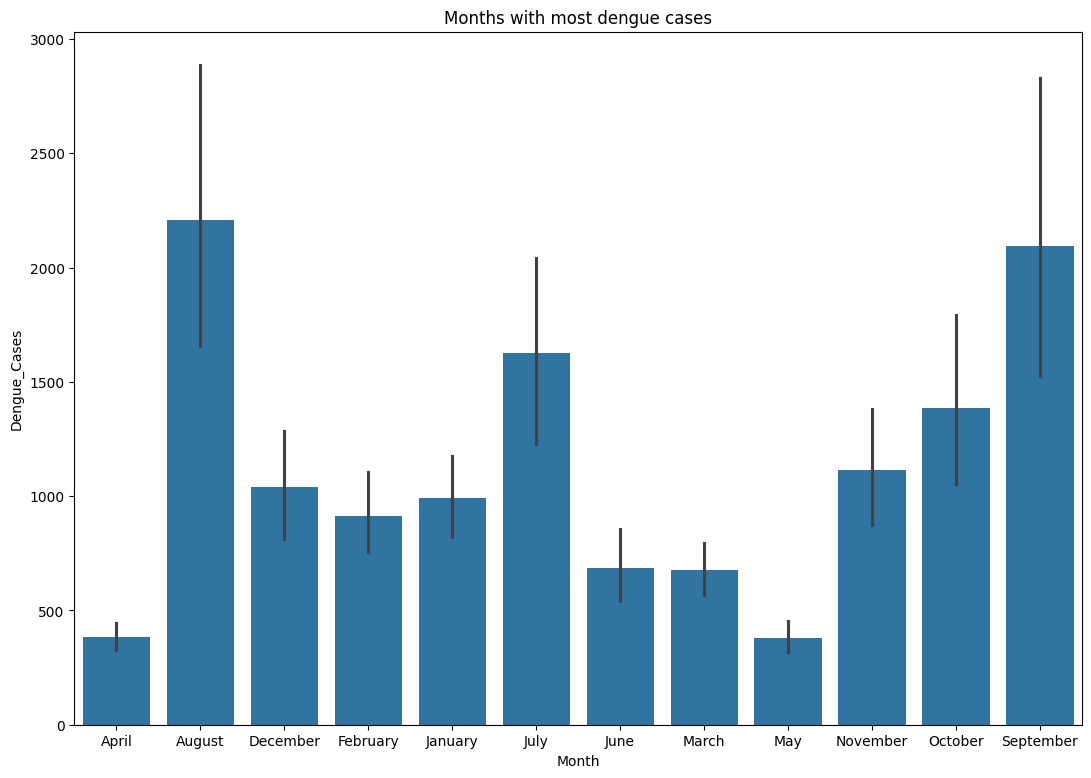

In [7]:
sns.barplot(data=data, x='Month', y='Dengue_Cases')
plt.gcf().set_size_inches(13, 9)
plt.title("Months with most dengue cases")
plt.show()

### 2. Region with most death cases

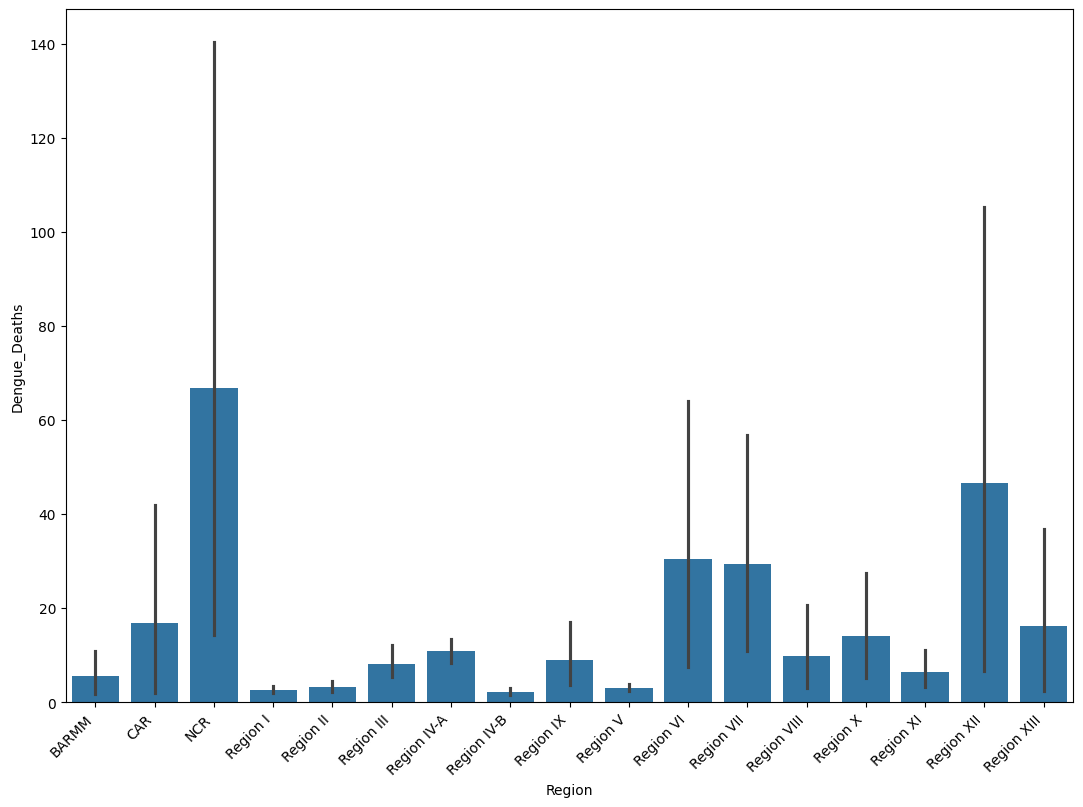

In [8]:
sns.barplot(data=data, x='Region', y='Dengue_Deaths')
plt.gcf().set_size_inches(13, 9)
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Year with mortality rate

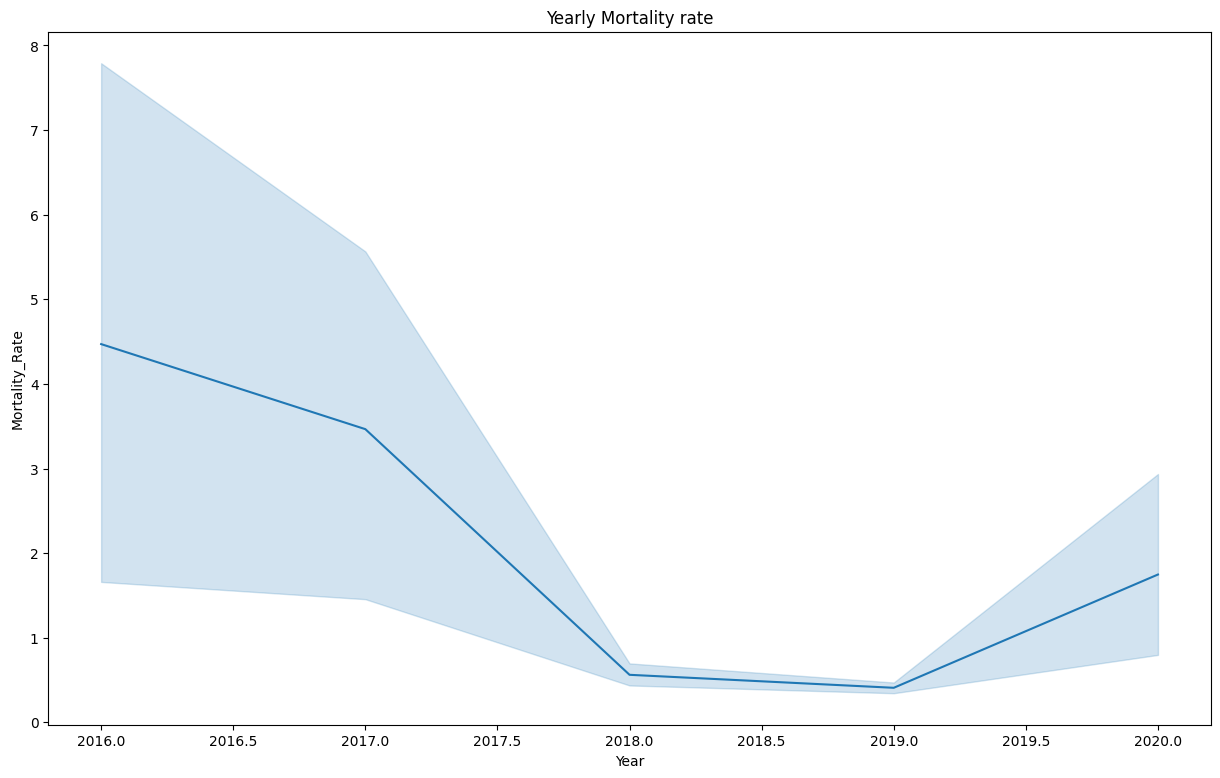

In [9]:
regional = data.groupby(['Region', 'Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()

regional['Mortality_Rate'] = np.round((regional['Dengue_Deaths'] / regional['Dengue_Cases']) * 100, 2)

sns.lineplot(data=regional, x='Year', y='Mortality_Rate')
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 4. Regional Mortality Rate

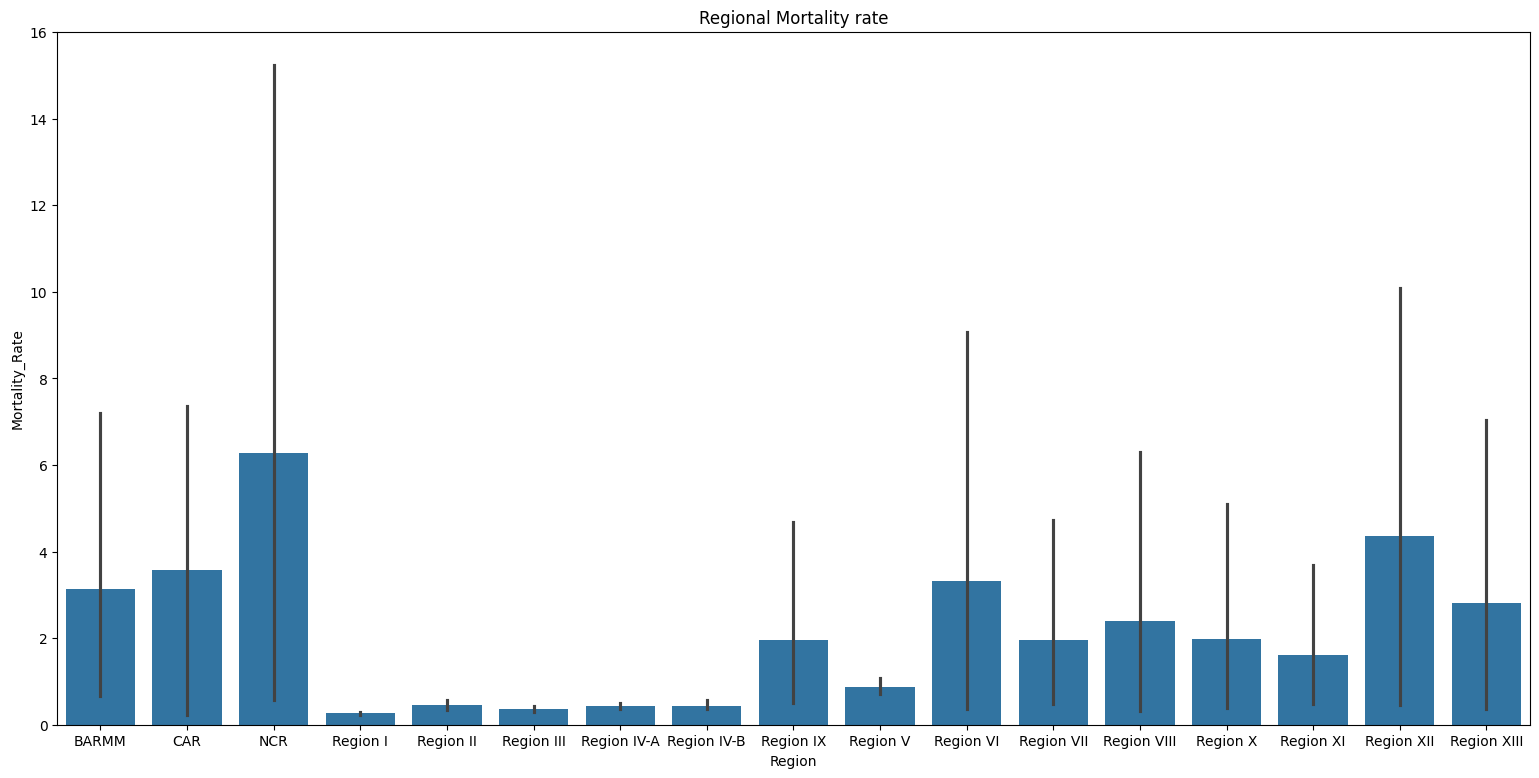

In [10]:
regional['Mortality_Rate'] = np.round((regional['Dengue_Deaths'] / regional['Dengue_Cases']) * 100, 2)

sns.barplot(data=regional, x='Region', y='Mortality_Rate')
plt.title("Regional Mortality rate")
plt.gcf().set_size_inches(19, 9)
plt.show()

### 5. Yearly Mortality Rate in the Philippines

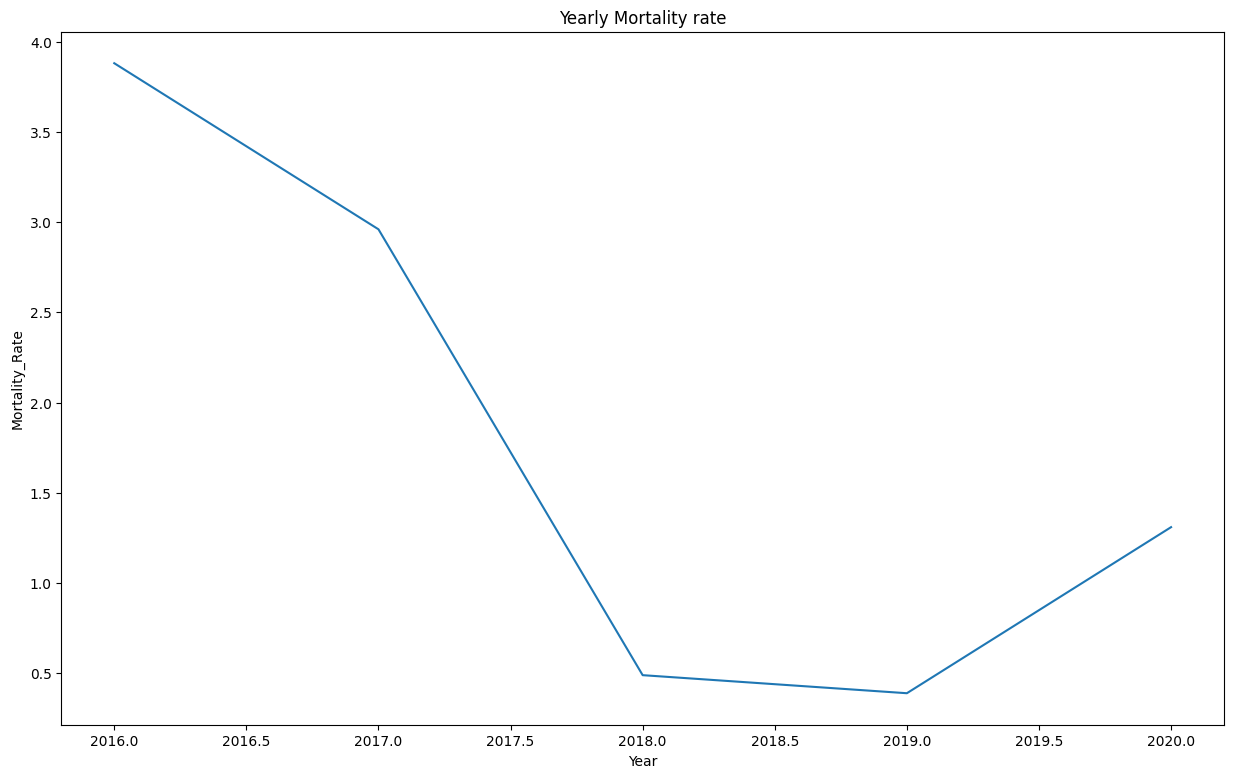

In [11]:
yearly = data.groupby(['Year'])[['Dengue_Deaths', 'Dengue_Cases']].sum()

yearly['Mortality_Rate'] = np.round((yearly['Dengue_Deaths'] / yearly['Dengue_Cases']) * 100, 2)

sns.lineplot(data=yearly, x='Year', y='Mortality_Rate', markers=True)
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 6. Dengue Hostpots based on Cases per Year

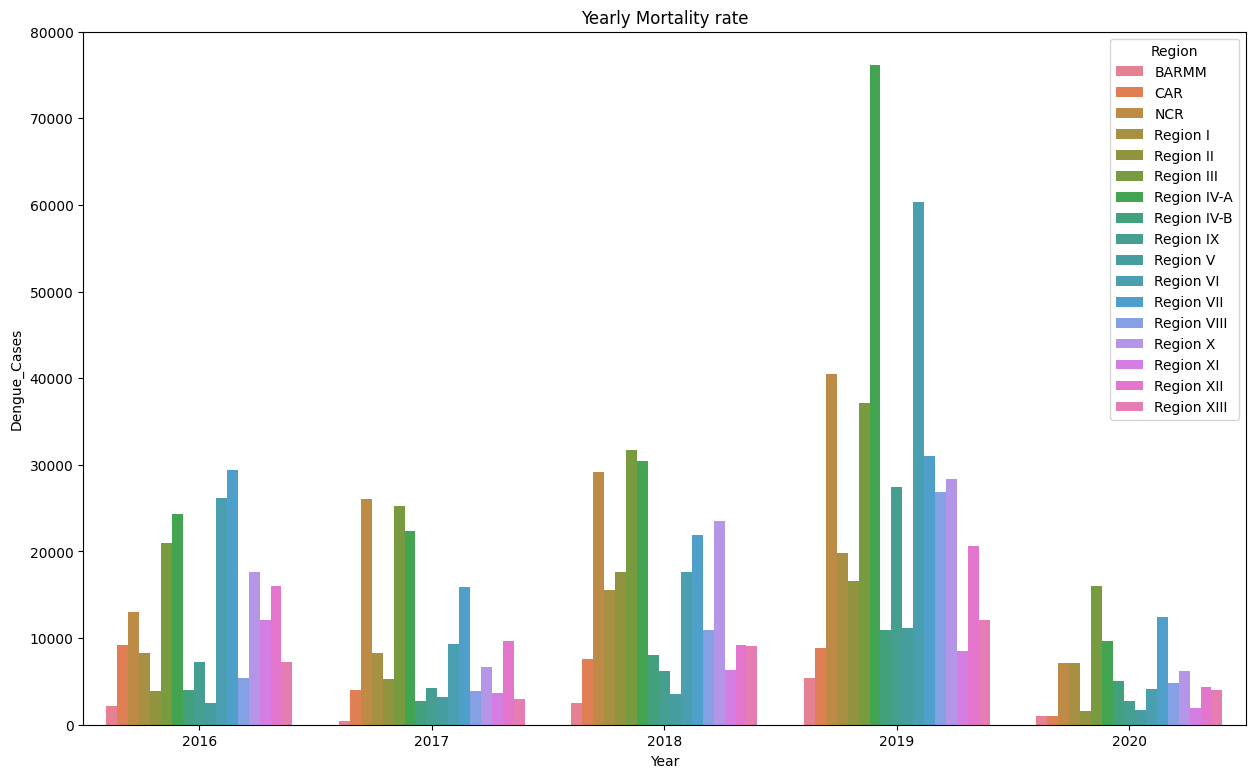

In [12]:
monthly = data.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum()

sns.barplot(data=monthly, x='Year', y='Dengue_Cases', hue='Region')
plt.title("Yearly Mortality rate")
plt.gcf().set_size_inches(15, 9)
plt.show()

### 7. Yearly Mortality Rate per Region

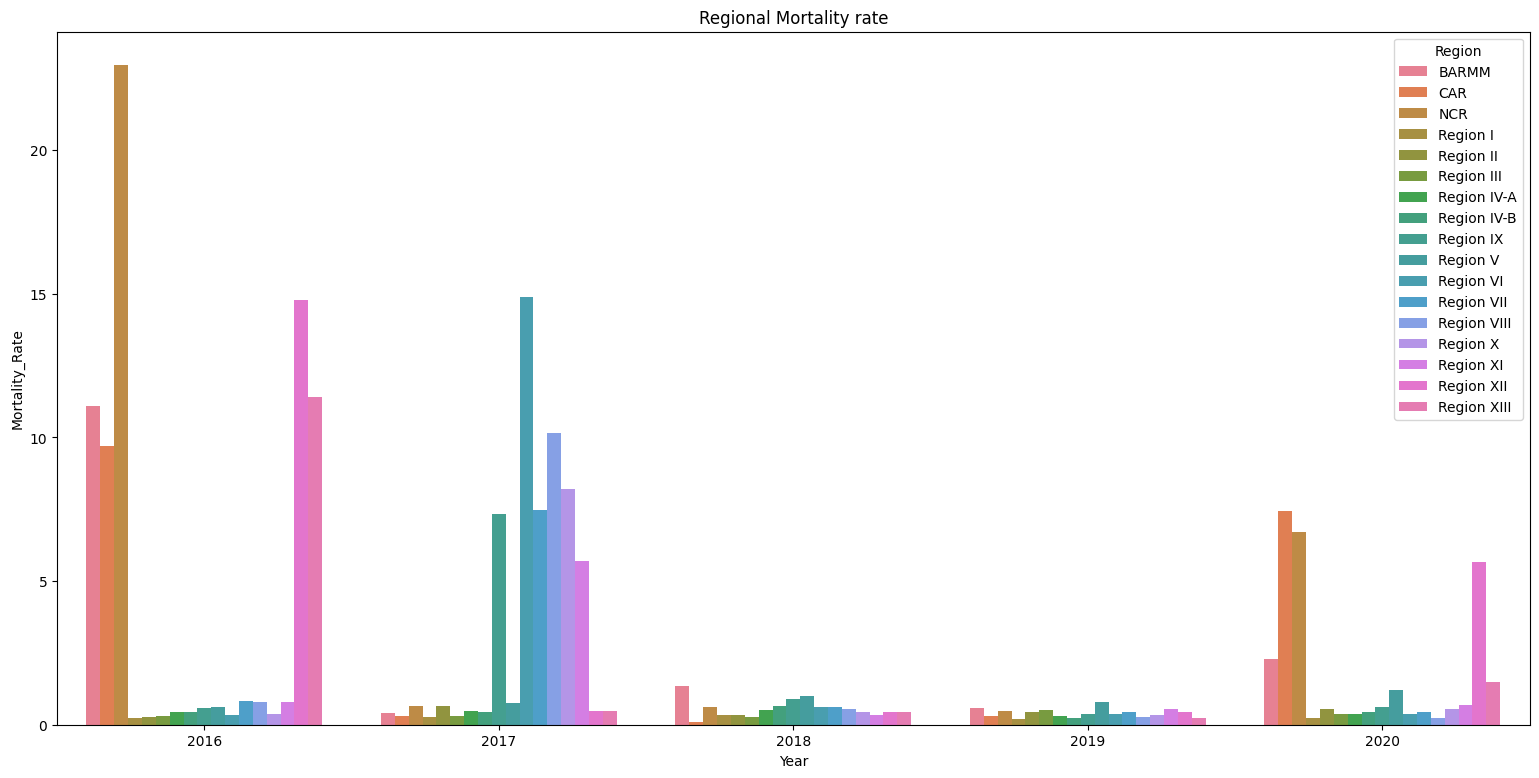

In [13]:
sns.barplot(data=regional, x='Year', y='Mortality_Rate', hue='Region')
plt.title("Regional Mortality rate")
plt.gcf().set_size_inches(19, 9)
plt.show()

### 8. 2016 Regional Montly Mortality Rate

In [52]:
### Ready function for monthly rates
def monthly_mortalty(year):
    _month = data[data['Year'] == 2016]
    
    monthly = _month.groupby(['Region', 'Month'])[['Dengue_Cases', 'Dengue_Deaths']].sum()
    
    sns.barplot(data=monthly, x='Month', y='Dengue_Cases', hue='Region')
    plt.title(f"{year} Mortality rate")
    plt.gcf().set_size_inches(15, 9)
    plt.show()

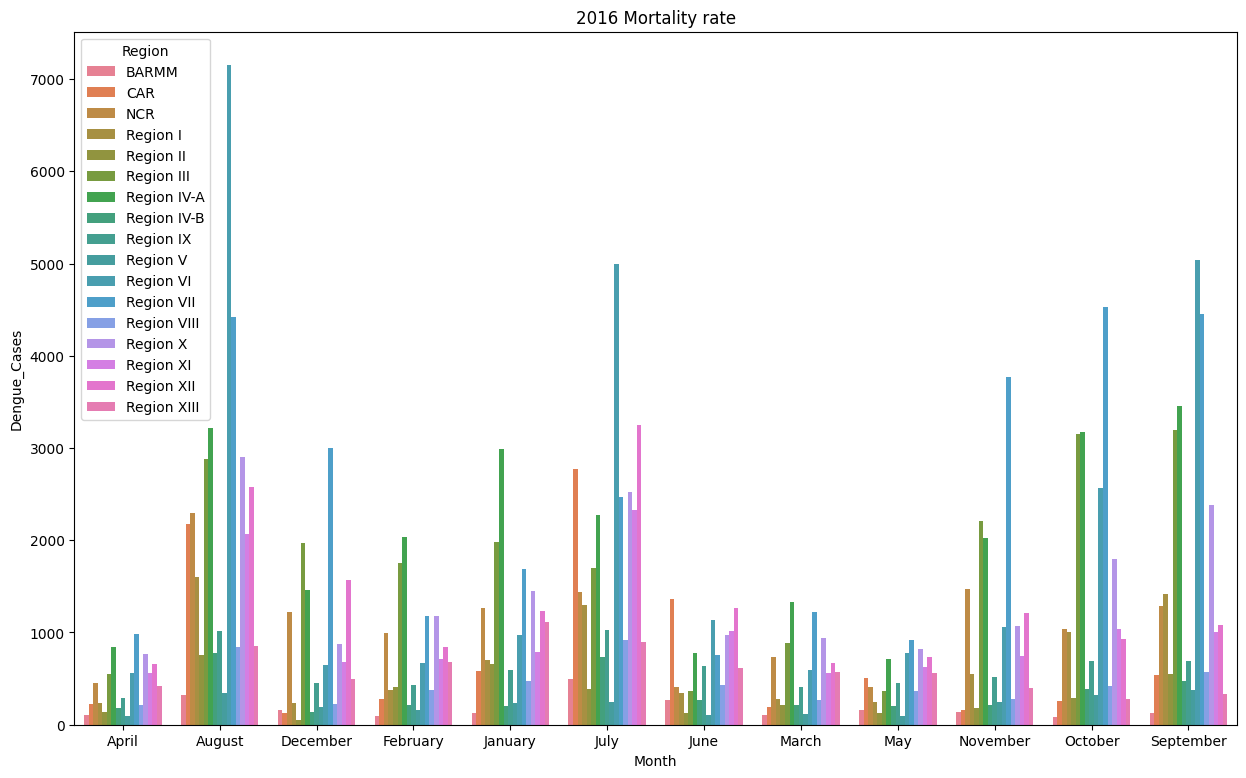

In [53]:
monthly_mortalty(2016)

### 9. 2017 Monthly Regional Mortality Rate

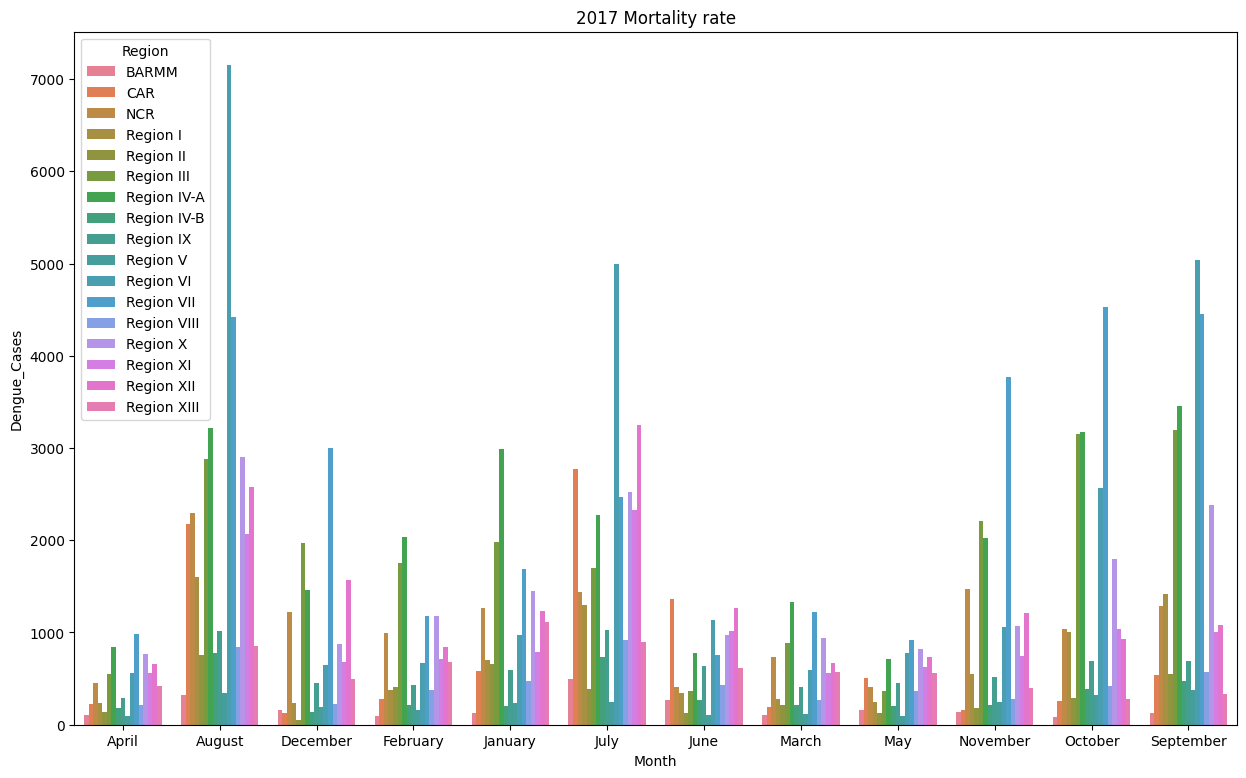

In [54]:
monthly_mortalty(2017)

### 9. 2018 Monthly Regional Mortality Rate

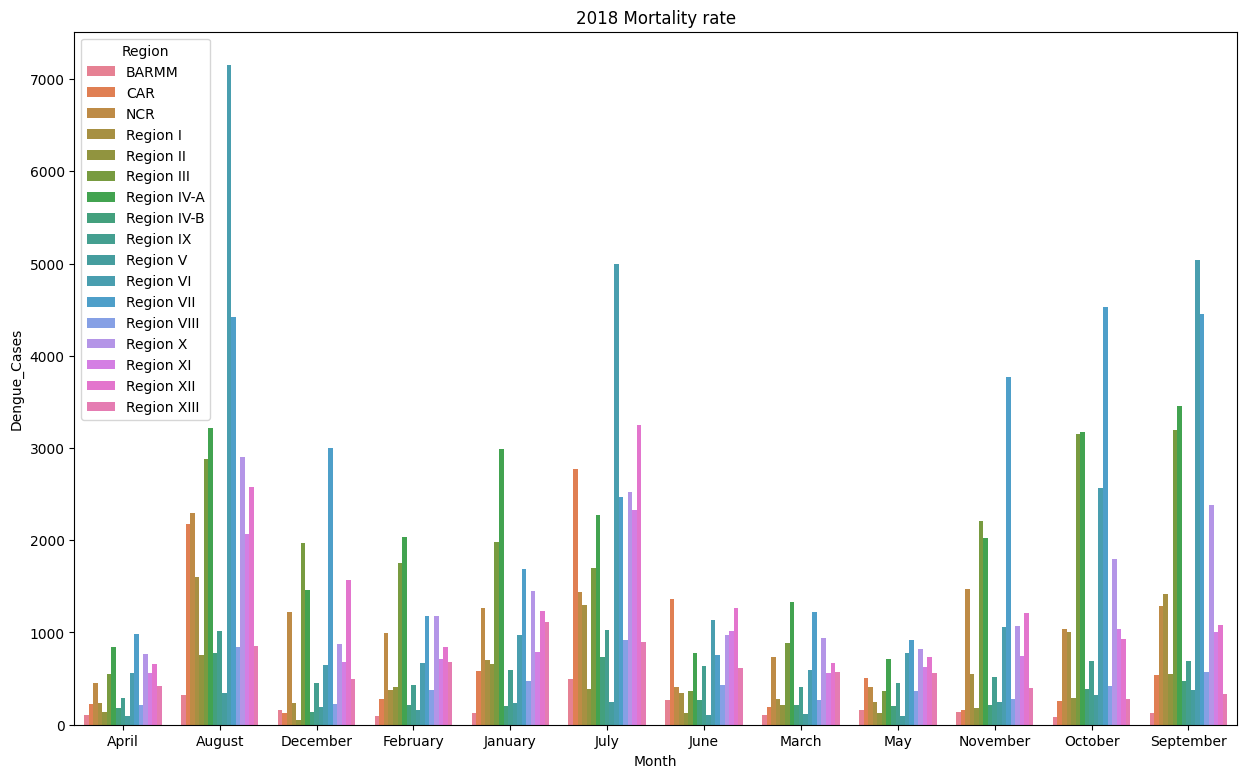

In [56]:
monthly_mortalty(2018)

### 10. 2020 Monthly Regional Mortality Rate

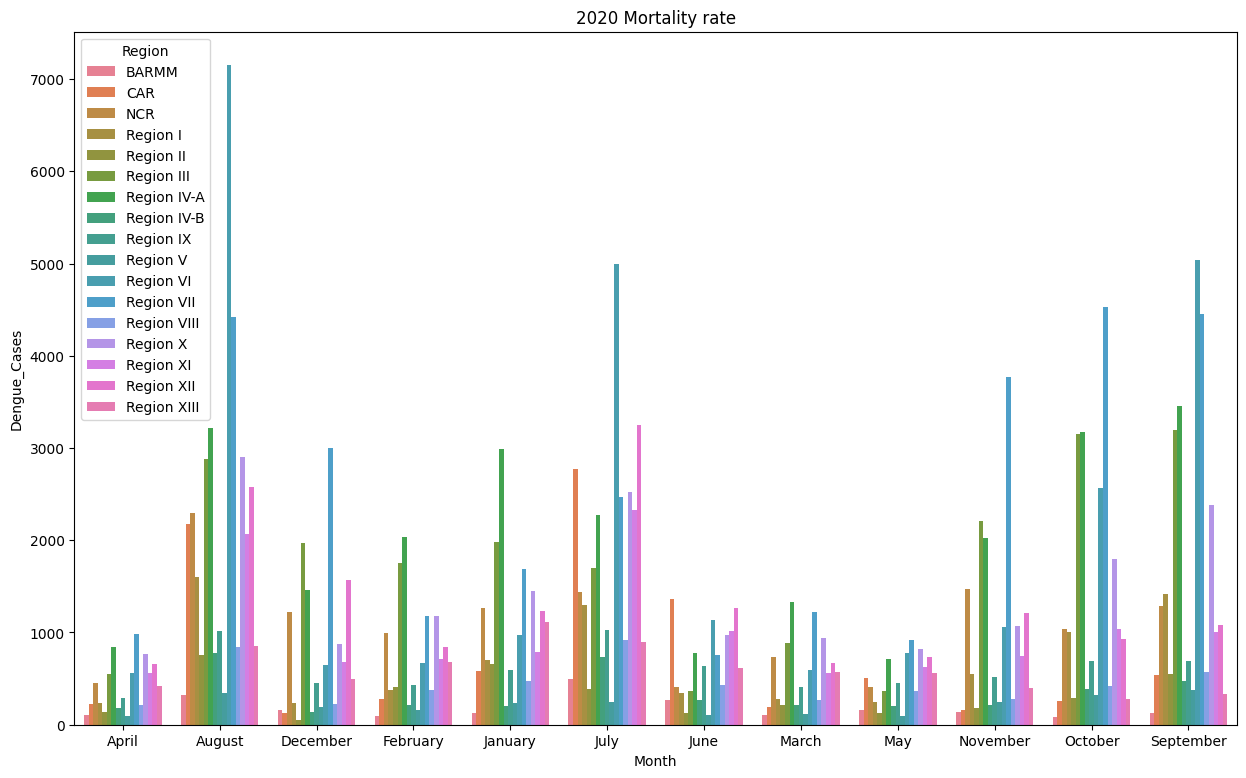

In [58]:
monthly_mortalty(2020)

In [59]:
### Ready function for monthly every year rates Per region
def monthly_year_mortalty(region):
    _month = data[data['Region'] == region]
    
    monthly = _month.groupby(['Year', 'Month'])[['Dengue_Cases', 'Dengue_Deaths']].sum()
    
    sns.barplot(data=monthly, x='Month', y='Dengue_Cases', hue='Year')
    plt.title(f"{region} Monthly Mortality rate every year")
    plt.gcf().set_size_inches(15, 9)
    plt.show()

### 11. Region 1 Monthly Mortality Rate every year

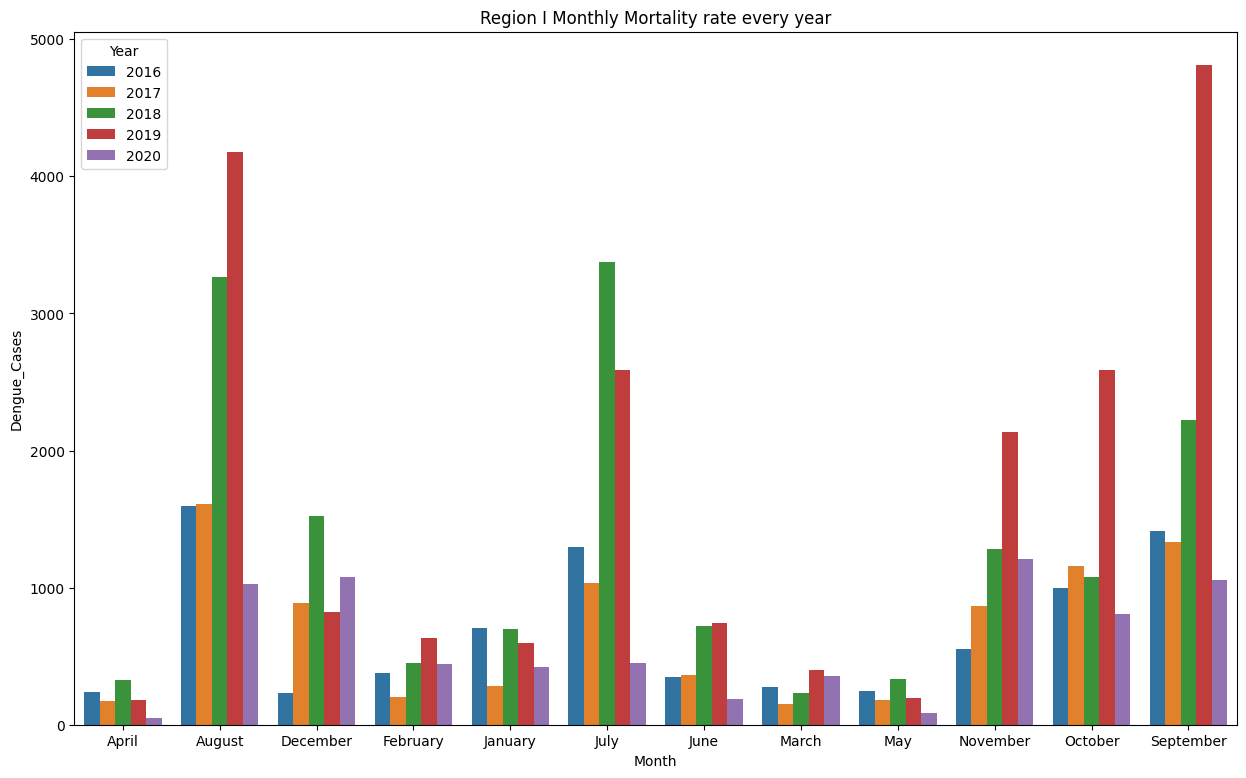

In [60]:
monthly_year_mortalty('Region I')

### 12. Region 2 Monthly Mortality Rate every year

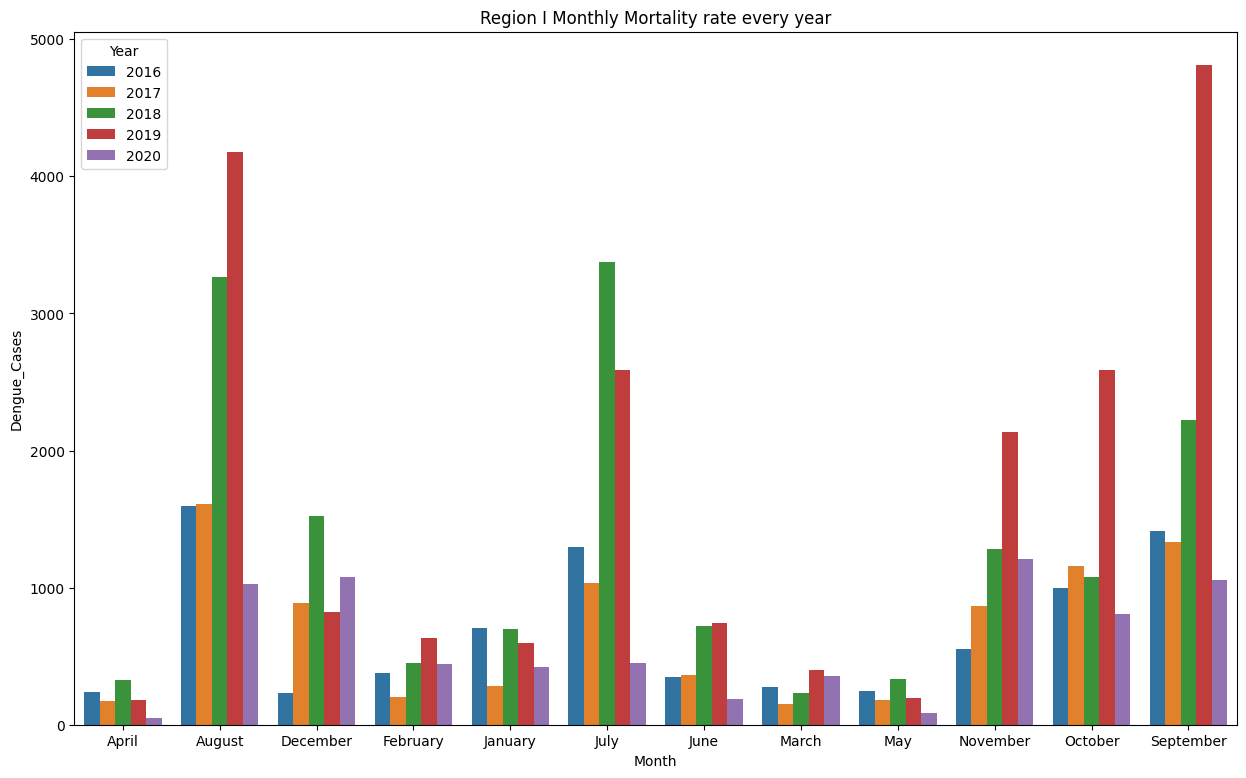

In [60]:
monthly_year_mortalty('Region II')

### 13. CAR Monthly Mortality Rate every year

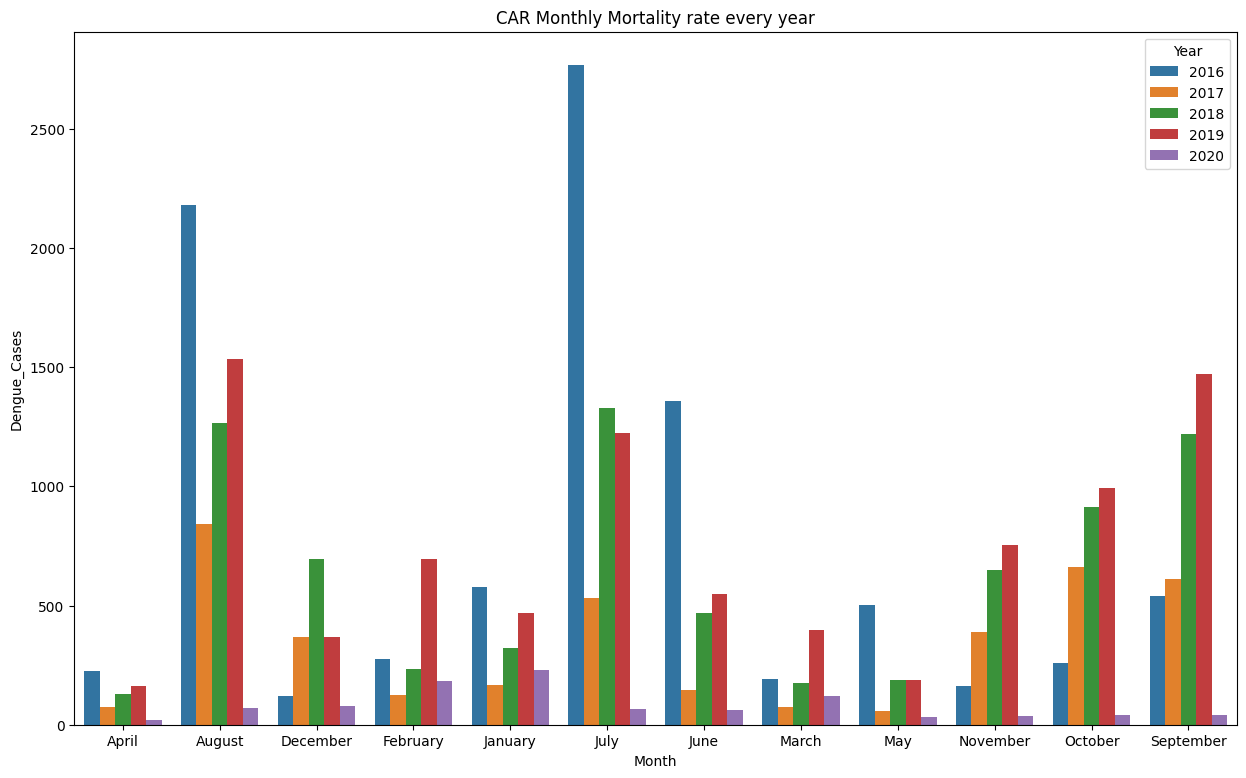

In [61]:
monthly_year_mortalty('CAR')

### 14. Region 3 Monthly Mortality Rate every year

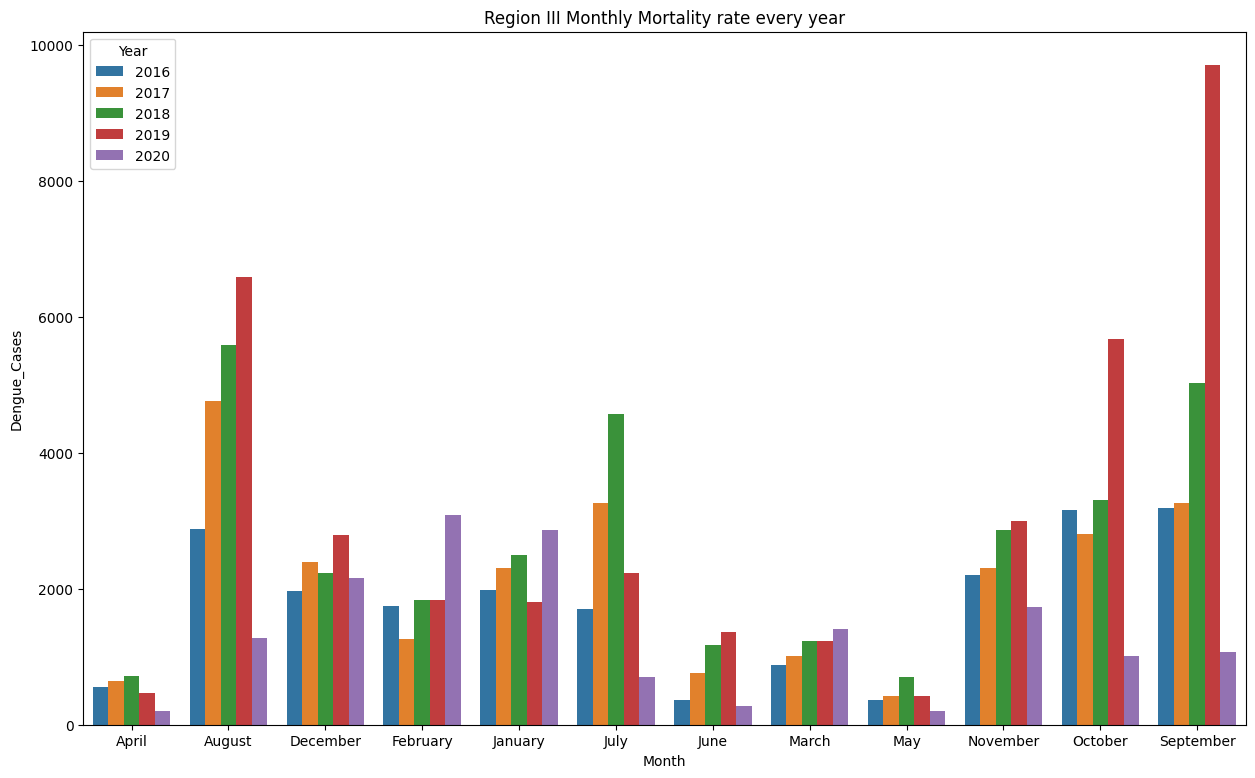

In [62]:
monthly_year_mortalty('Region III')

### 15. Region 4A Monthly Mortality Rate every year

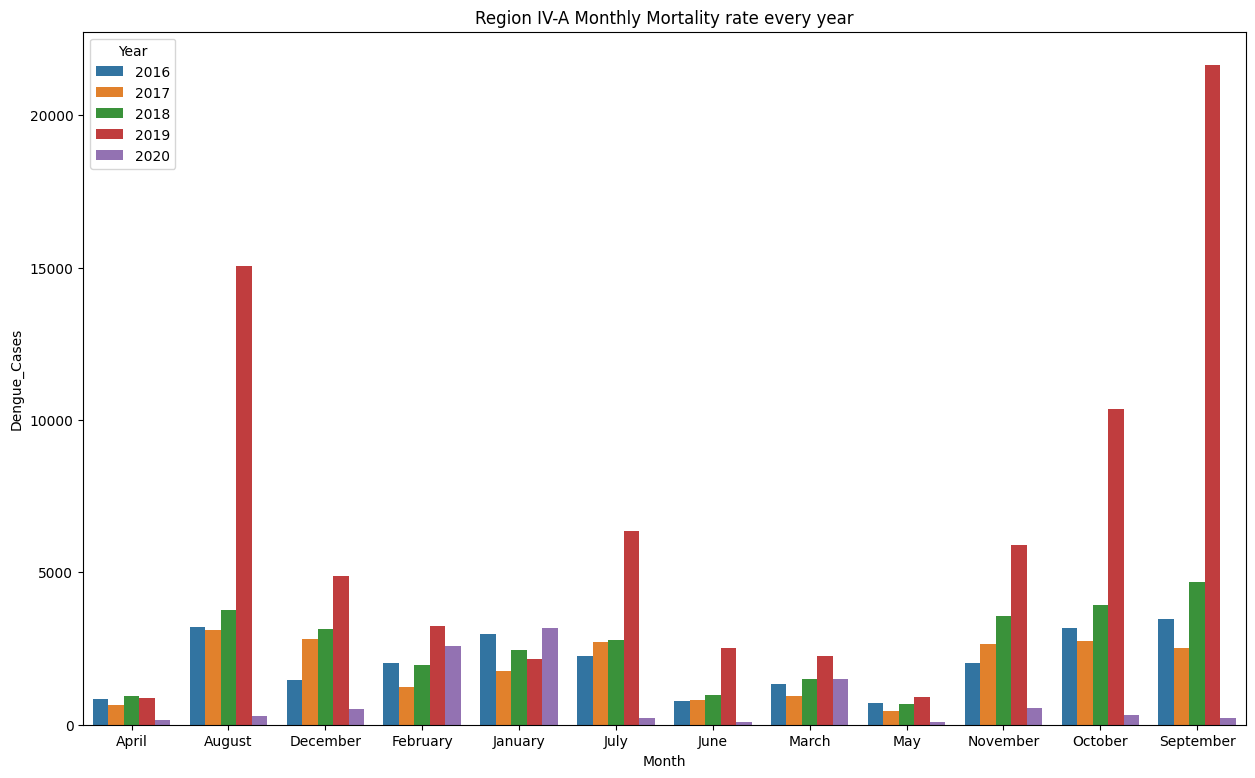

In [63]:
monthly_year_mortalty('Region IV-A')

### 16. Region 4B Monthly Mortality Rate every year

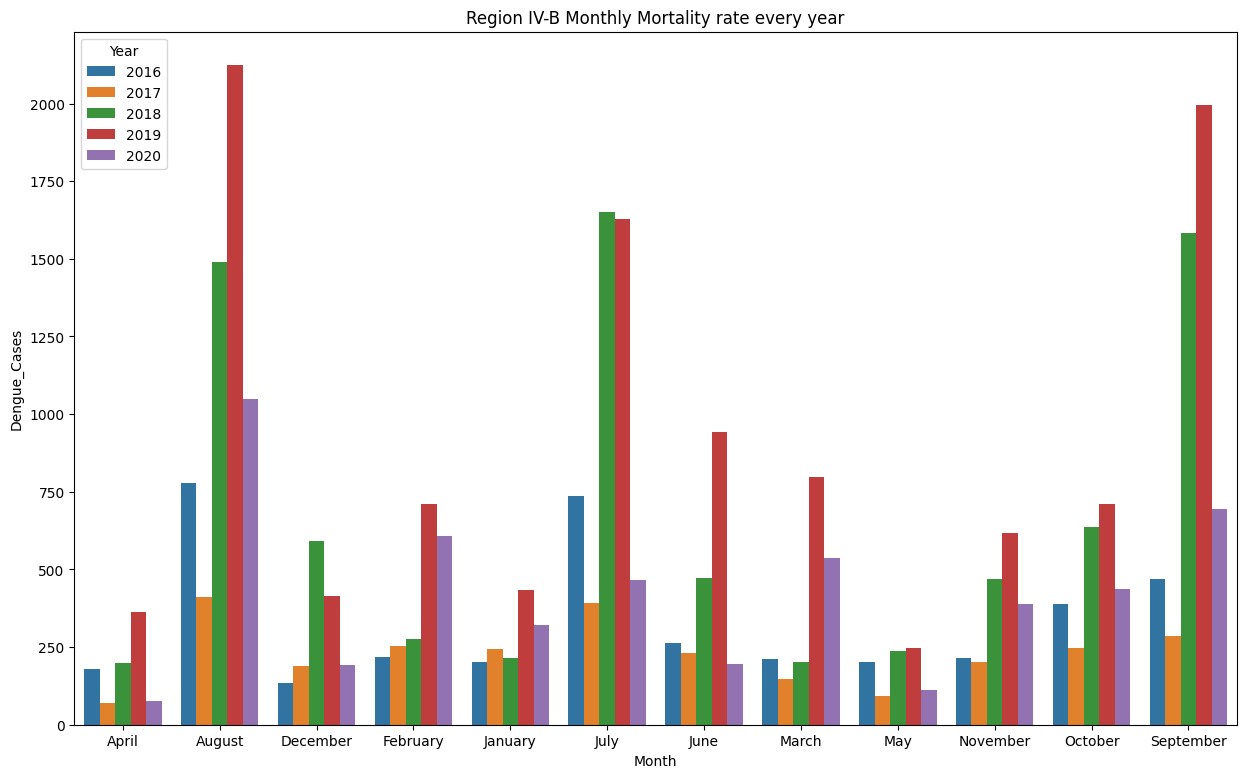

In [64]:
monthly_year_mortalty('Region IV-B')

### 17. Region 5 Monthly Mortality Rate every year

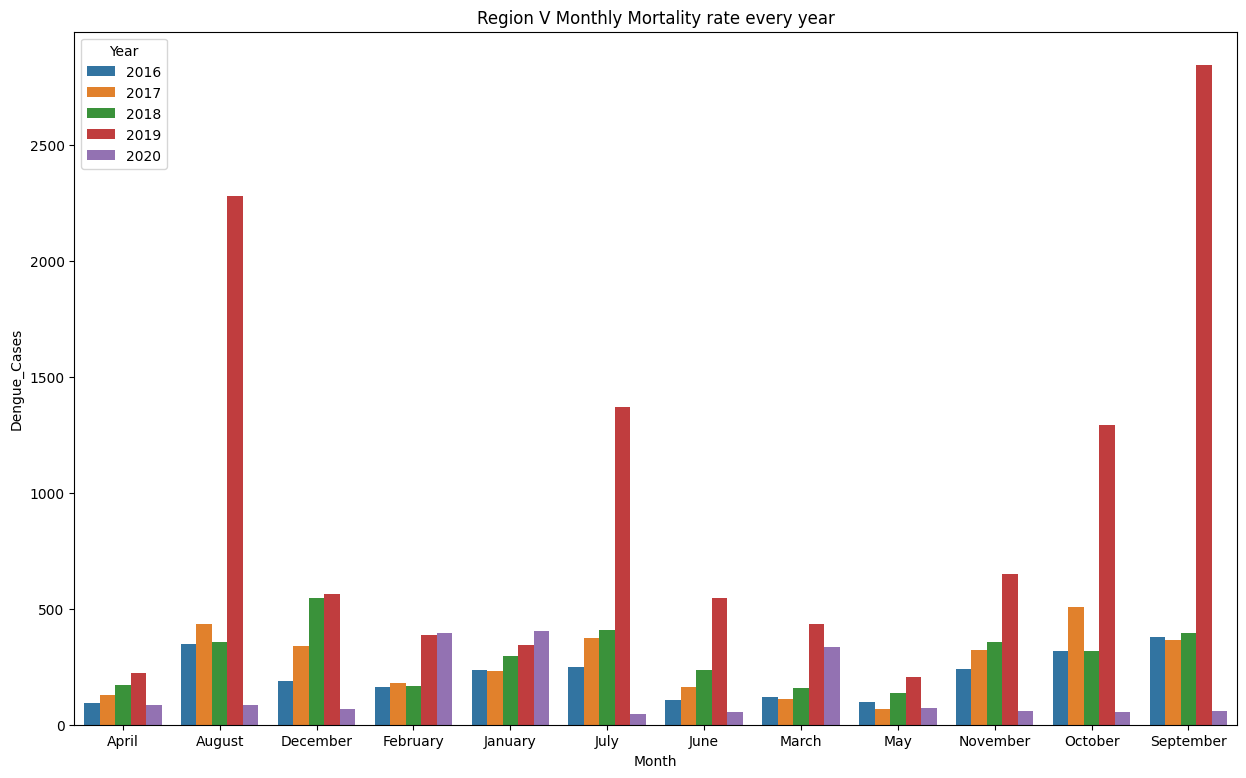

In [65]:
monthly_year_mortalty('Region V')

### 18. Region 6 Monthly Mortality Rate every year

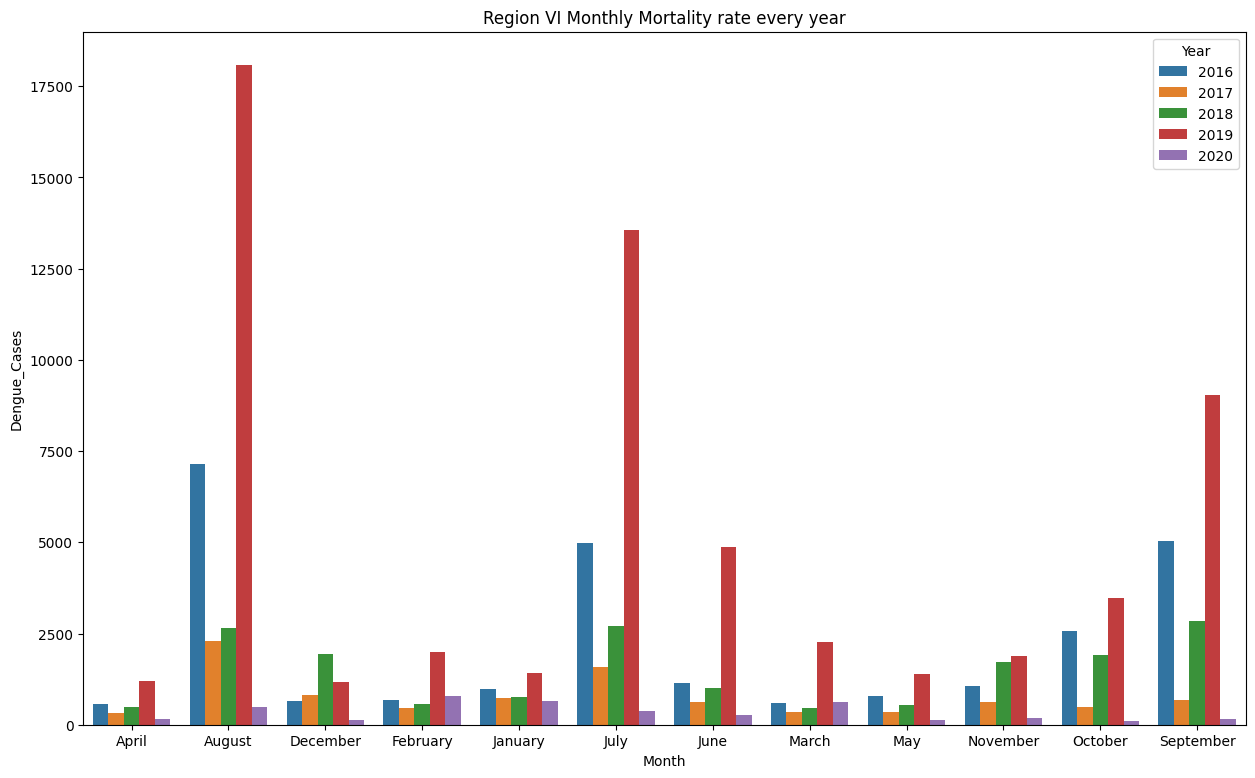

In [66]:
monthly_year_mortalty('Region VI')

### 19. BARMM Monthly Mortality Rate every year

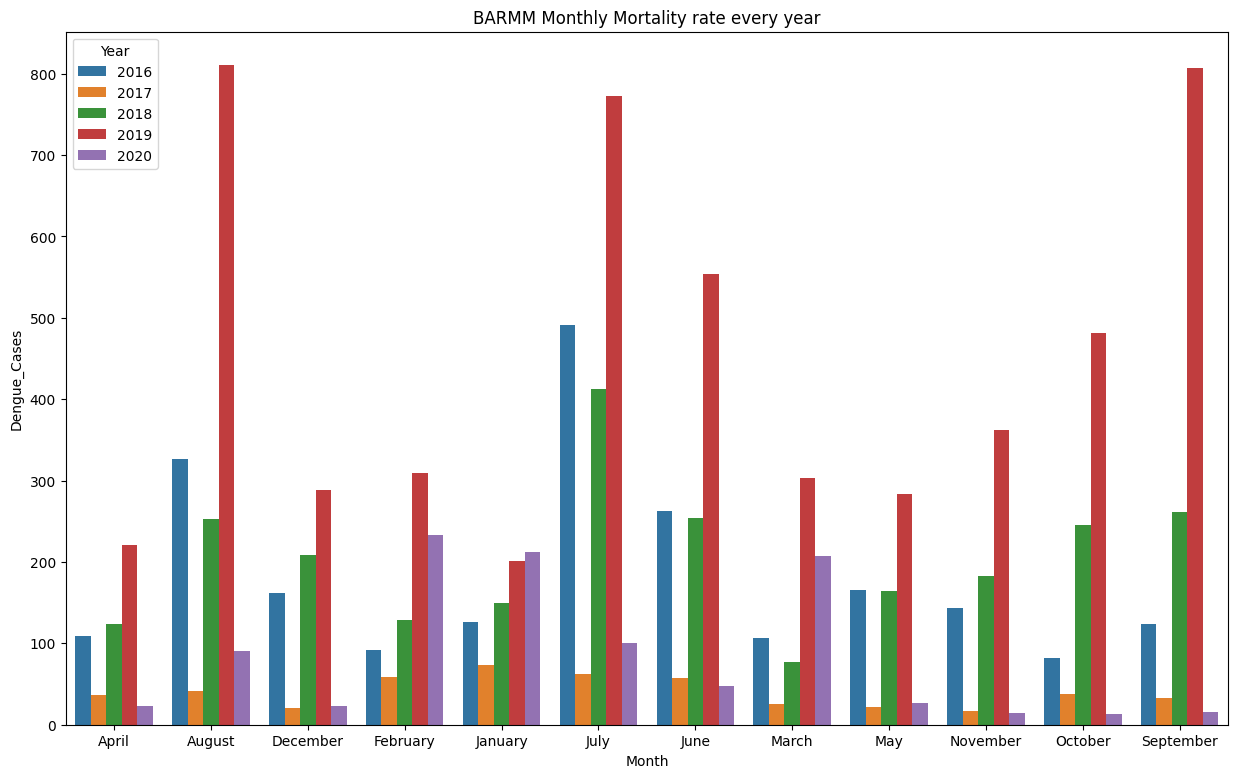

In [67]:
monthly_year_mortalty('BARMM')

### 20. NCR Monthly Mortality Rate every year

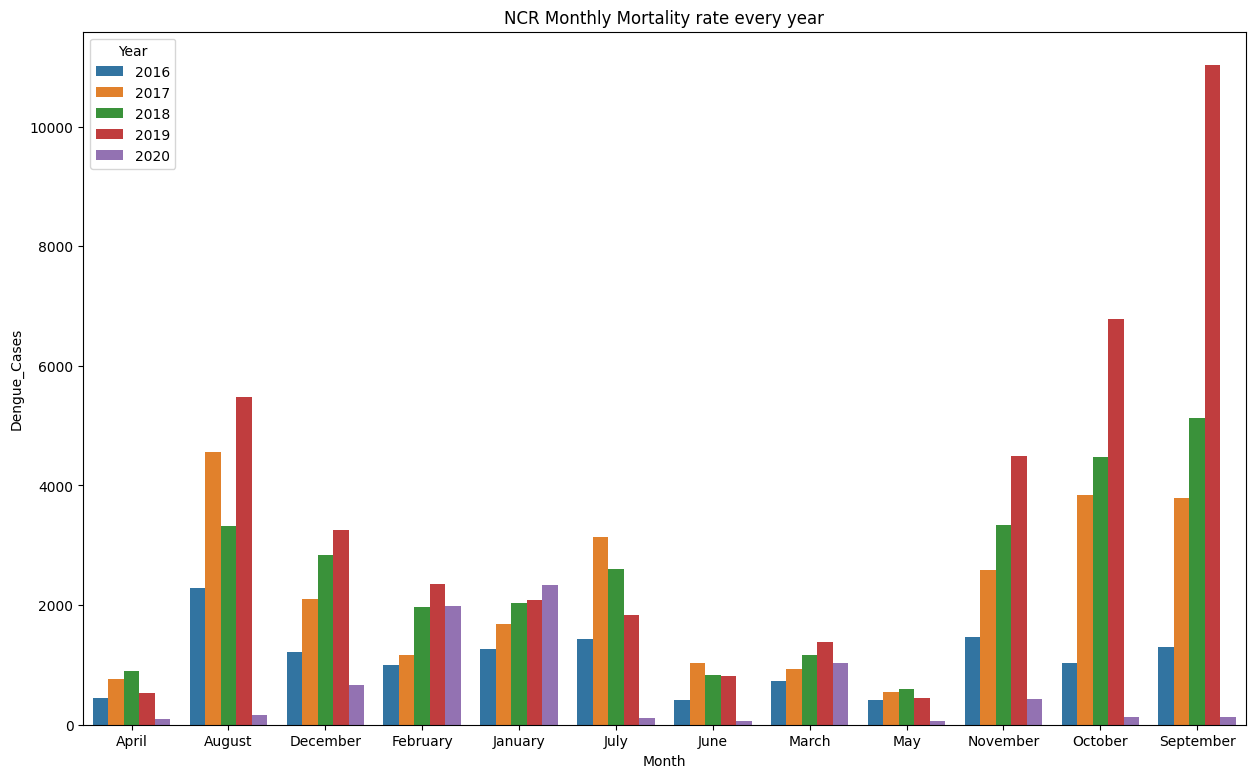

In [68]:
monthly_year_mortalty('NCR')